In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('D:/kuliah/sem3/saskom/uas/data4.xlsx')

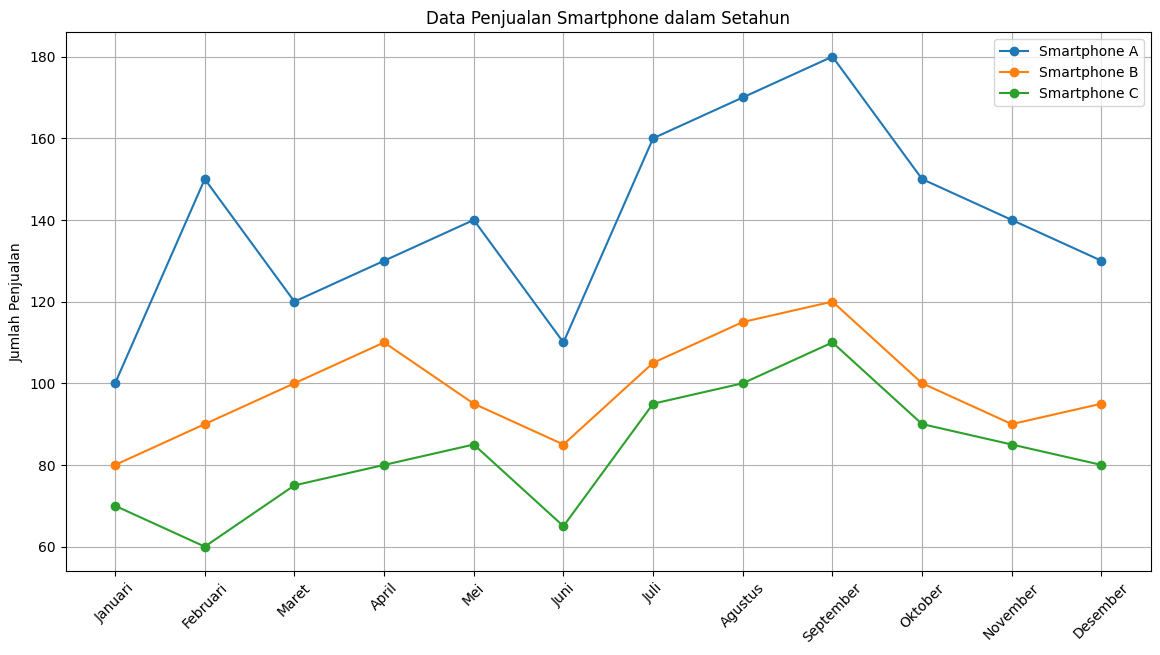

        bulan  penjualan_smartphone_A  penjualan_smartphone_B  \
0     Januari                     100                      80   
1    Februari                     150                      90   
2       Maret                     120                     100   
3       April                     130                     110   
4         Mei                     140                      95   
5        Juni                     110                      85   
6        Juli                     160                     105   
7     Agustus                     170                     115   
8   September                     180                     120   
9     Oktober                     150                     100   
10   November                     140                      90   
11   Desember                     130                      95   

    penjualan_smartphone_C  
0                       70  
1                       60  
2                       75  
3                       80  
4        

In [3]:
plt.figure(figsize=(14,7))
plt.plot(data['bulan'], data['penjualan_smartphone_A'], label='Smartphone A', marker='o')
plt.plot(data['bulan'], data['penjualan_smartphone_B'], label='Smartphone B', marker='o')
plt.plot(data['bulan'], data['penjualan_smartphone_C'], label='Smartphone C', marker='o')
plt.title('Data Penjualan Smartphone dalam Setahun')
plt.xlabel('')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

print(data)

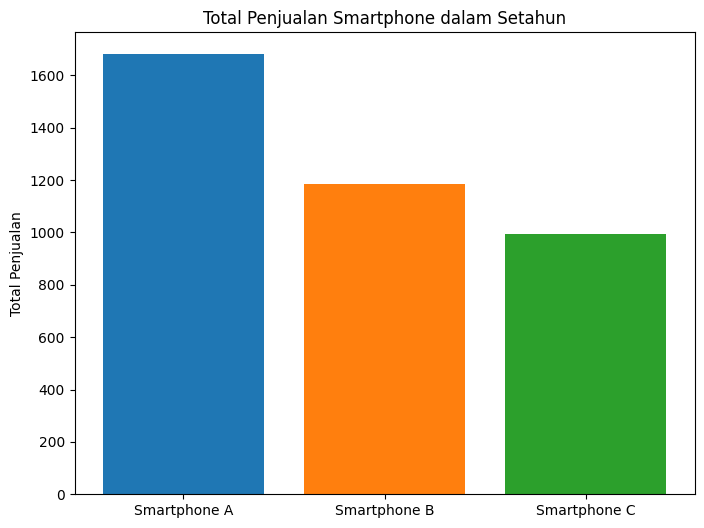

Total Penjualan Smartphone A :  1680
Total Penjualan Smartphone A :  1185
Total Penjualan Smartphone A :  995


In [4]:
total_penjualan_A = data['penjualan_smartphone_A'].sum()
total_penjualan_B = data['penjualan_smartphone_B'].sum()
total_penjualan_C = data['penjualan_smartphone_C'].sum()

produk = ['Smartphone A', 'Smartphone B', 'Smartphone C']
penjualan = [total_penjualan_A, total_penjualan_B, total_penjualan_C]
warna = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(8, 6))
plt.bar(produk, penjualan, color=warna)
plt.title('Total Penjualan Smartphone dalam Setahun')
plt.xlabel('')
plt.ylabel('Total Penjualan')
plt.show()

print('Total Penjualan Smartphone A : ', total_penjualan_A)
print('Total Penjualan Smartphone A : ', total_penjualan_B)
print('Total Penjualan Smartphone A : ', total_penjualan_C)

In [5]:
def calculate_probabilites(df):
    for brand in ['smartphone_A', 'smartphone_B', 'smartphone_C']:
        df[f'Probabilitas {brand}'] = df[f'penjualan_{brand}'] / df[f'penjualan_{brand}'].sum()
        df[f'Kumulatif {brand}'] = df[f'Probabilitas {brand}'].cumsum()
    return df

In [6]:
df = calculate_probabilites(data)

In [7]:
def monte_carlo_simulation(df, brand, num_simulations):
    simulated_values = []
    for _ in range(num_simulations):
        rand = np.random.random()
        for i, row in df.iterrows():
            if rand <= row[f'Kumulatif {brand}']:
                simulated_values.append(row[f'penjualan_{brand}'])
                break
    return simulated_values

In [8]:
def predict_sales(df, num_simulations, num_predicts):
    simulated_a = monte_carlo_simulation(df, 'smartphone_A', num_simulations)
    simulated_b = monte_carlo_simulation(df, 'smartphone_B', num_simulations)
    simulated_c = monte_carlo_simulation(df, 'smartphone_C', num_simulations)

    predicted_data = pd.DataFrame({
        'Bulan': data['bulan'][:num_predicts].values,
        'Prediksi Penjualan Smartphone A': simulated_a[:num_predicts],
        'Prediksi Penjualan Smartphone B': simulated_b[:num_predicts],
        'Prediksi Penjualan Smartphone C': simulated_c[:num_predicts]
    })

    return predicted_data

In [9]:
num_simulations = 100
num_predicts = 12
predicted_data = predict_sales(df, num_simulations, num_predicts)

In [11]:
print(predicted_data)

        Bulan  Prediksi Penjualan Smartphone A  \
0     Januari                              150   
1    Februari                              130   
2       Maret                              150   
3       April                              140   
4         Mei                              140   
5        Juni                              100   
6        Juli                              160   
7     Agustus                              140   
8   September                              130   
9     Oktober                              130   
10   November                              170   
11   Desember                              130   

    Prediksi Penjualan Smartphone B  Prediksi Penjualan Smartphone C  
0                                80                               95  
1                               100                               95  
2                               115                               70  
3                               100                              

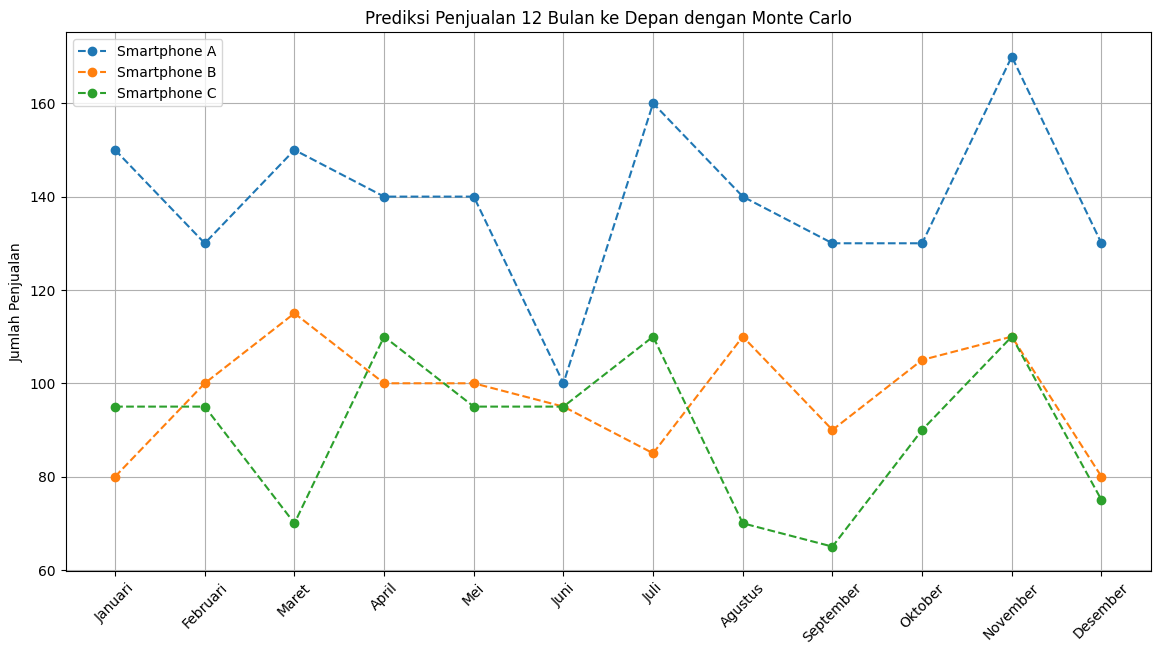

In [12]:
plt.figure(figsize=(14,7))
plt.plot(predicted_data['Bulan'], predicted_data['Prediksi Penjualan Smartphone A'], label='Smartphone A', linestyle='--', marker='o')
plt.plot(predicted_data['Bulan'], predicted_data['Prediksi Penjualan Smartphone B'], label='Smartphone B', linestyle='--', marker='o')
plt.plot(predicted_data['Bulan'], predicted_data['Prediksi Penjualan Smartphone C'], label='Smartphone C', linestyle='--', marker='o')
plt.title('Prediksi Penjualan 12 Bulan ke Depan dengan Monte Carlo')
plt.xlabel('')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()